# Subscription Prediction for bank Marketing Data

In [28]:
# import the important libraries.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import os
print(os.listdir("../input"))

import warnings
warnings.filterwarnings('ignore')
import pandas_profiling as pp

FileNotFoundError: [WinError 3] The system cannot find the path specified: '../input'

In [29]:
from aif360.datasets import StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric
import matplotlib.patches as patches
from aif360.algorithms.preprocessing import Reweighing
#from packages import *
#from ml_fairness import *
import matplotlib.pyplot as plt
import seaborn as sns



from IPython.display import Markdown, display

### Load the dataset.

In [30]:
# data Loading
data=pd.read_csv('../../Data/bank-additional-full.csv', sep = ';')
data.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
29292,55,management,married,university.degree,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
24952,32,technician,divorced,professional.course,no,no,no,cellular,nov,tue,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
25869,35,blue-collar,married,basic.9y,no,yes,no,cellular,nov,wed,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no
26797,29,entrepreneur,married,university.degree,no,yes,yes,cellular,nov,thu,...,3,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,no
1435,29,services,divorced,high.school,no,no,no,telephone,may,thu,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


In [4]:
print("Shape of the data:",data.shape)
print("Columns Names are:\n",data.columns)

Shape of the data: (41188, 21)
Columns Names are:
 Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [5]:
print("General Information about the Data")
data.info()

General Information about the Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 

In [6]:
print("Data Types for all the columns of the data: \n",data.dtypes)

Data Types for all the columns of the data: 
 age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


### Numeric or categorical data

In [7]:
numeric_data = data.select_dtypes(include = np.number)
numeric_data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [8]:
numeric_data.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [9]:
categorical_data = data.select_dtypes(exclude = np.number)
categorical_data.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


In [10]:
categorical_data.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [11]:
pp.ProfileReport(data)

NameError: name 'pp' is not defined

In [ ]:
print("Is there any null values in the data ? \n",data.isnull().values.any())

In [ ]:
print("Total Null Values in the data = ",data.isnull().sum().sum())

In [ ]:
total= data.isnull().sum()
percent_missing = data.isnull().sum()/data.isnull().count()
print(percent_missing)

In [ ]:
data[data.duplicated(keep='first')]

In [12]:
data.drop_duplicates(keep='first',inplace=True)

In [13]:
print("Information about the dataframe : \n ")
data.info()

Information about the dataframe : 
 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64

#### Total numbers of missing values values in each column. ####

In [14]:
# Which columns have the most missing values?
def missing_data(df):
    total = df.isnull().sum()
    percent = total/df.isnull().count()*100
    missing_values = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in df.columns:
        dtype = str(df[col].dtype)
        types.append(dtype)
    missing_values['Types'] = types
    missing_values.sort_values('Total',ascending=False,inplace=True)
    return(np.transpose(missing_values))
missing_data(data)

,age,campaign,nr.employed,euribor3m,cons.conf.idx,cons.price.idx,emp.var.rate,poutcome,previous,pdays,...,job,day_of_week,month,contact,loan,housing,default,education,marital,y
Total,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Types,int64,int64,float64,float64,float64,float64,float64,object,int64,int64,...,object,object,object,object,object,object,object,object,object,object


In [15]:
print('Discrption of Numeric Data : ')
data.describe()

Discrption of Numeric Data : 


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [16]:
print('Discrption of Categorical Data : ')
data.describe(include='object')

Discrption of Categorical Data : 


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10419,24921,12164,32577,21571,33938,26135,13767,8618,35551,36537


### Check for class imbalance

Target values counts:
 no     36537
yes     4639
Name: y, dtype: int64


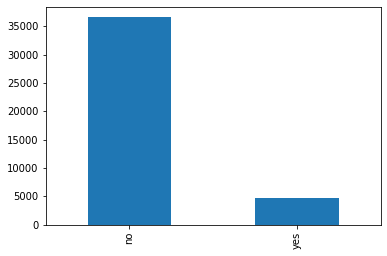

In [17]:
print("Target values counts:\n",data['y'].value_counts())
data['y'].value_counts().plot.bar()
plt.show()

In [18]:
class_values = (data['y'].value_counts()/data['y'].value_counts().sum())*100
class_values

no     88.733728
yes    11.266272
Name: y, dtype: float64

That makes it highly unbalanced, the positive class account for 11.27% of all target.

Histogram for the numerical features :



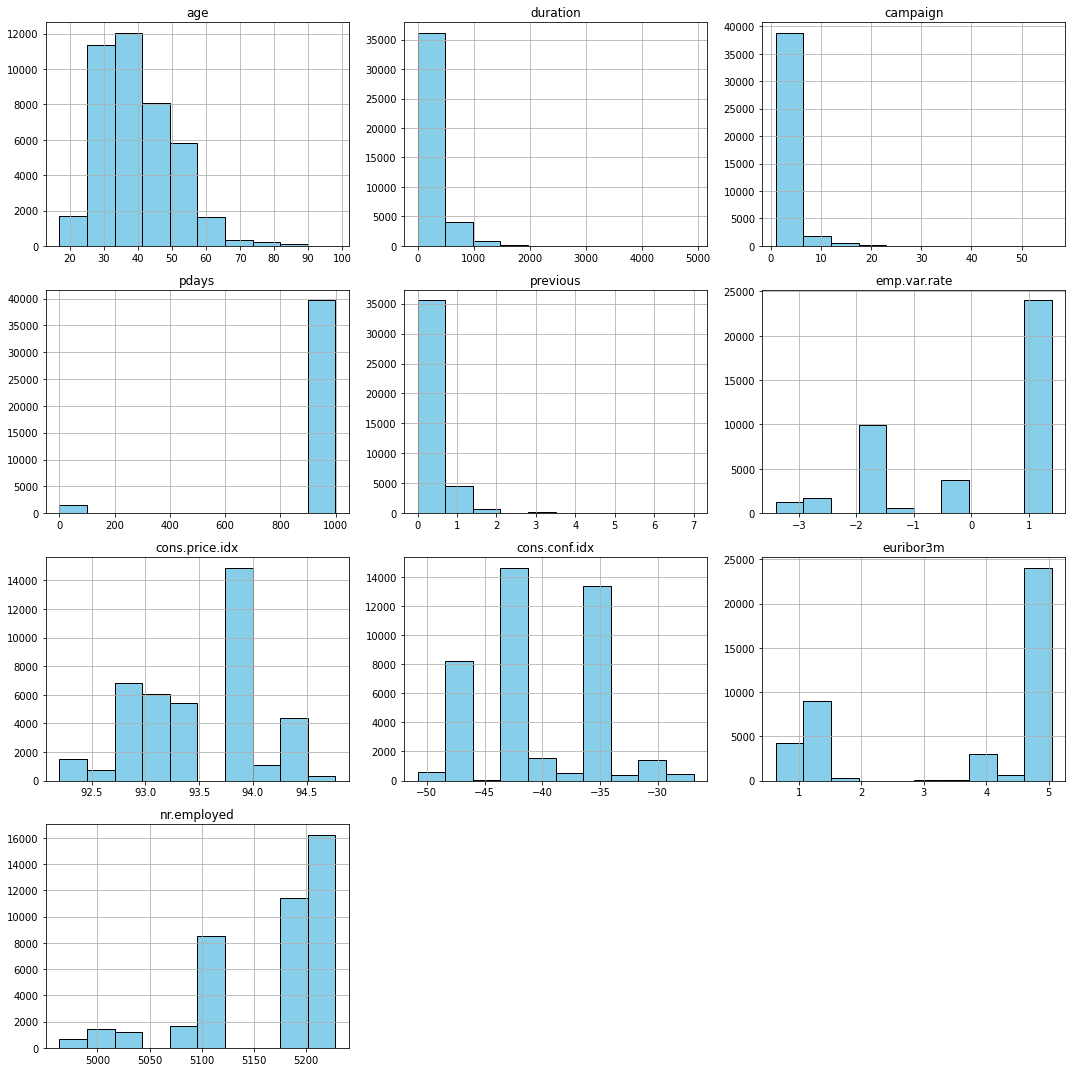

In [19]:
print("Histogram for the numerical features :\n")
data.hist(figsize=(15,15),edgecolor='k',color='skyblue')
plt.tight_layout()
plt.show()

### Univariate Analysis for categorical features

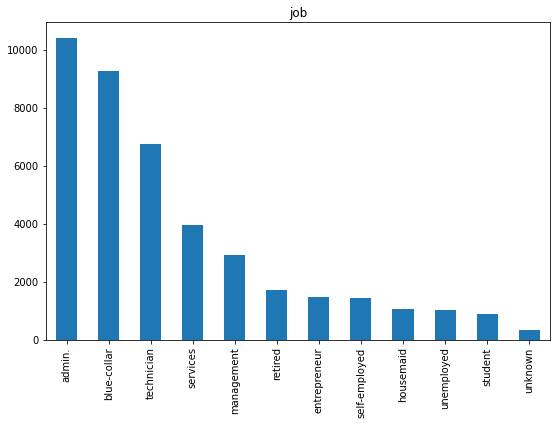

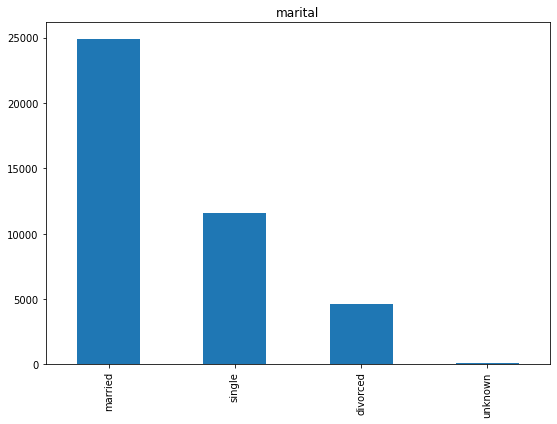

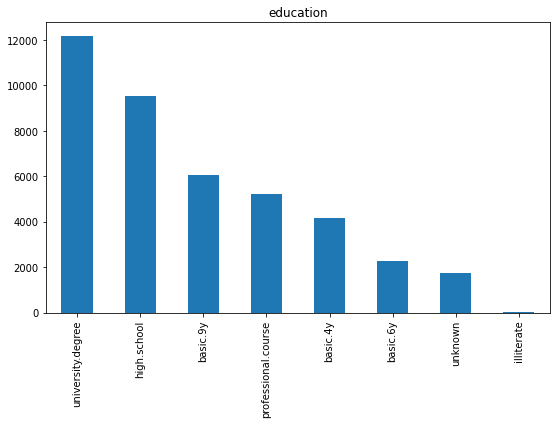

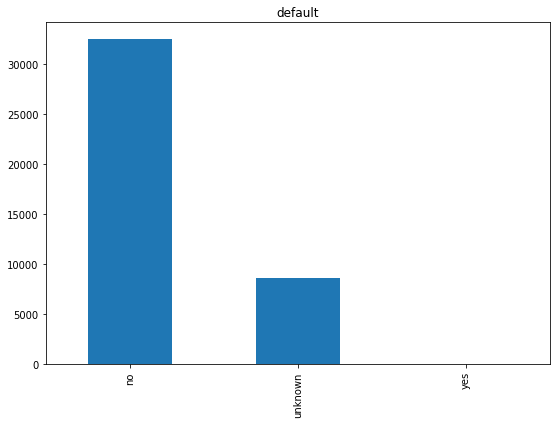

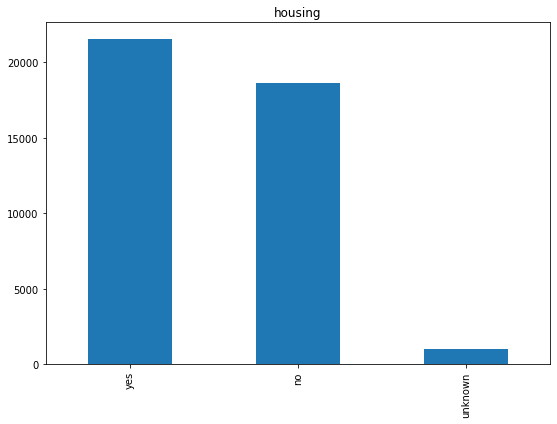

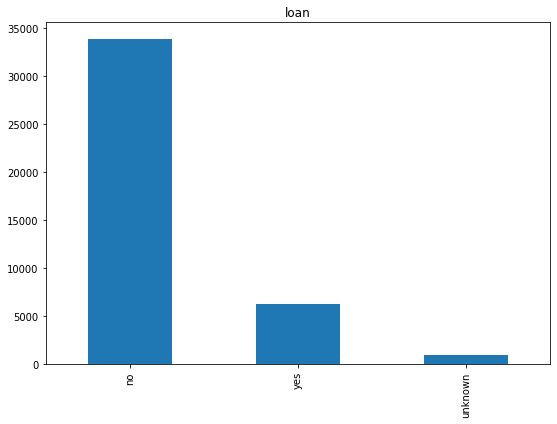

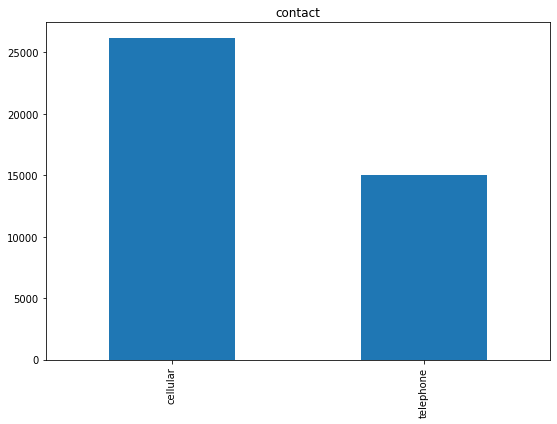

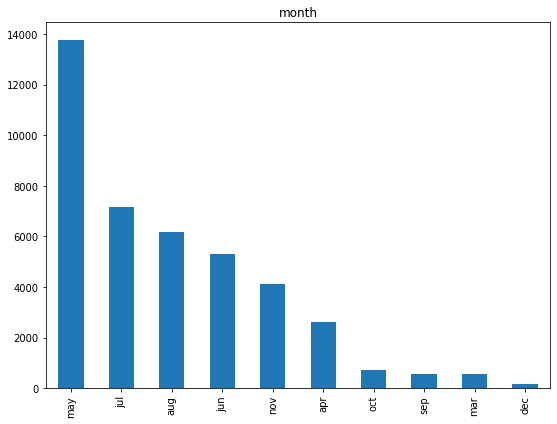

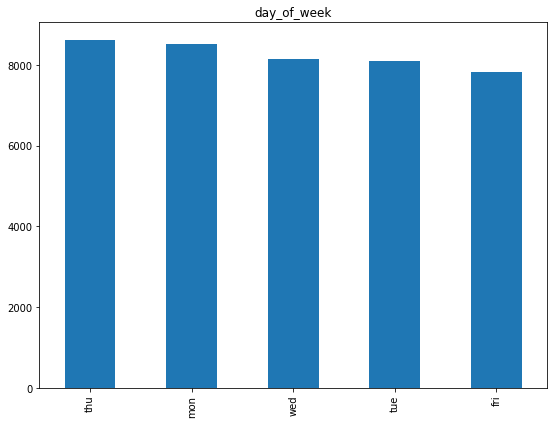

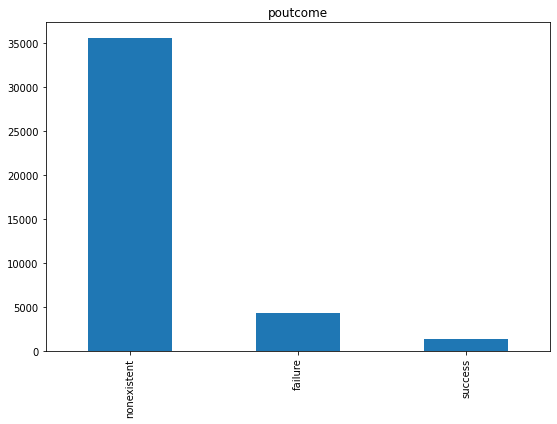

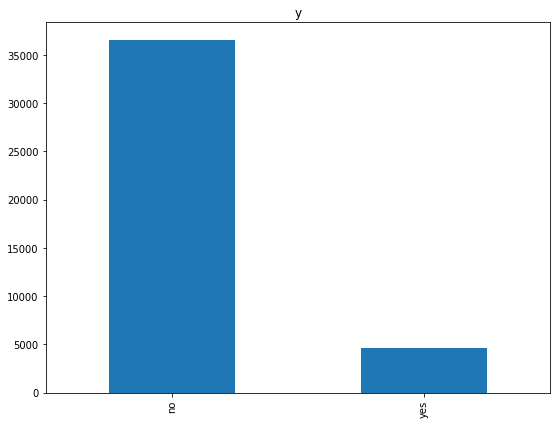

In [20]:
cols = categorical_data.columns
for column in cols:
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    data[column].value_counts().plot(kind='bar')
    plt.title(column)
    plt.tight_layout()

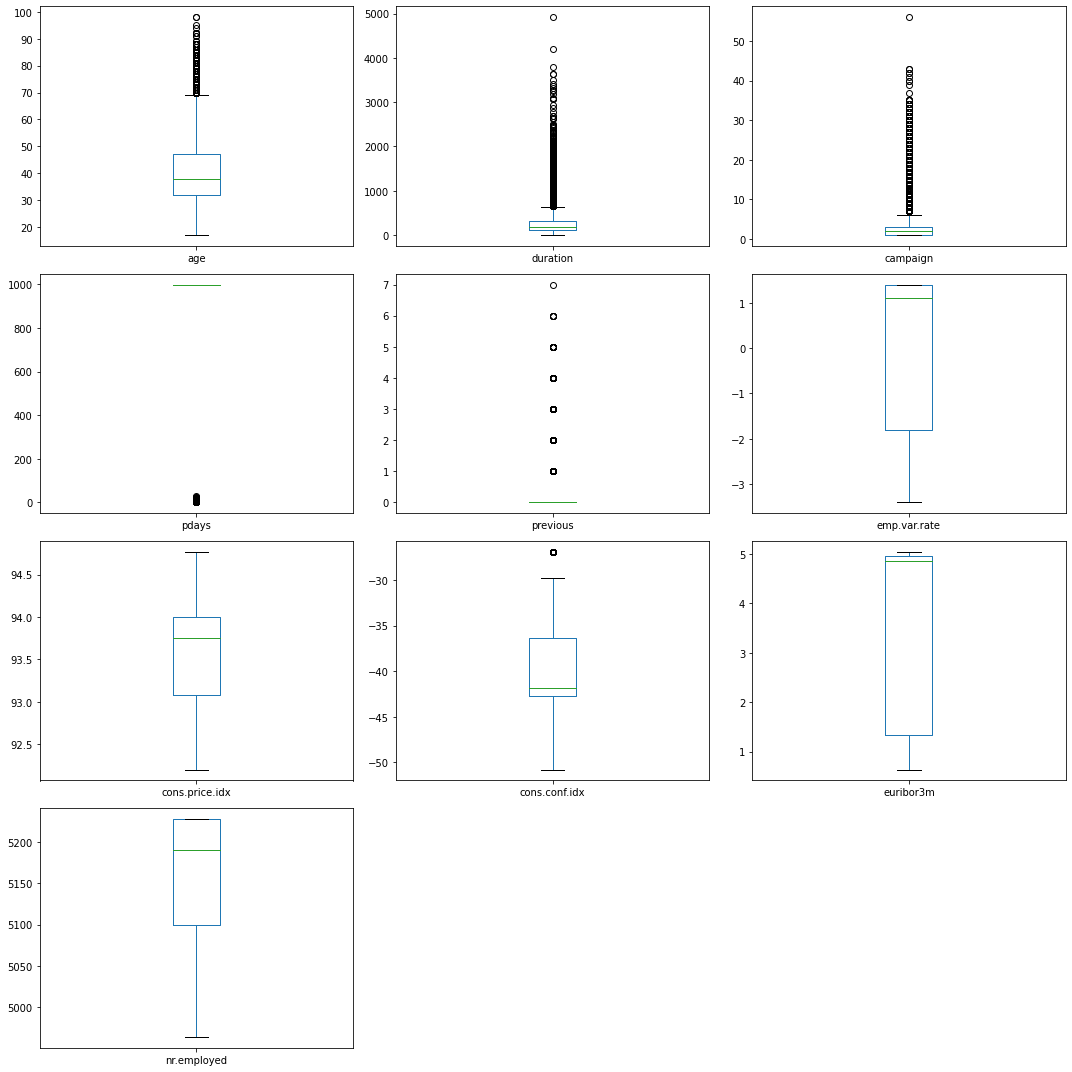

In [21]:

data.plot(kind='box',subplots=True,layout=(4,3),figsize=(15,15))
plt.tight_layout()

In [22]:
data.groupby(["contact"]).mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
contact,,,,,,,,,,
cellular,39.969122,263.561240,2.405242,945.730897,0.252956,-0.387285,93.315940,-41.386084,3.095127,5152.275072
telephone,40.118809,249.201449,2.850475,991.541387,0.034107,0.897208,94.027109,-38.968194,4.535551,5192.681258


In [23]:
data.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
education,,,,,,,,,,
basic.4y,47.596504,264.827826,2.600575,965.704981,0.147031,0.215924,93.658309,-40.239871,3.751768,5170.124880
basic.6y,40.449585,264.475775,2.556962,980.360105,0.129201,0.230773,93.649912,-41.129943,3.772470,5174.710956
basic.9y,39.061208,261.291811,2.532341,979.133168,0.141439,0.159239,93.623399,-41.326749,3.697963,5172.294012
high.school,37.996951,260.949117,2.568860,964.347456,0.185976,0.032843,93.584890,-40.940317,3.556085,5164.988394
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778
professional.course,40.083969,252.566603,2.586832,960.744084,0.163168,0.172309,93.569755,-40.123893,3.709739,5170.122805
university.degree,38.876356,253.237340,2.563713,951.792174,0.192453,-0.027425,93.493711,-39.976726,3.530225,5163.248027
unknown,43.485549,262.491329,2.597110,942.798266,0.226590,0.058324,93.658465,-39.876185,3.570291,5159.509884


In [24]:
data.pivot_table(values="age",index="month",columns=["marital","contact"])

marital   divorced               married                single             \
contact   cellular  telephone   cellular  telephone   cellular  telephone   
month                                                                       
apr      45.182456  46.846154  43.586328  47.440860  32.818182  31.602941   
aug      43.515539  47.083333  44.687890  45.753086  33.203728  31.204819   
dec      62.133333  71.000000  52.945055  46.347826  30.232558  35.000000   
jul      44.789082  44.184874  41.739701  41.088926  32.121951  32.859116   
jun      47.300000  44.509804  42.686684  41.392315  30.590909  34.390316   
mar      59.051724  43.500000  46.080402  46.371429  31.464602  32.130435   
may      42.789377  43.858811  39.370709  41.318907  32.561478  34.780315   
nov      45.286573  44.745098  42.582408  41.465649  35.183896  33.576577   
oct      62.078431  51.562500  50.473354  45.325000  31.450262  32.052632   
sep      58.175000  50.100000  49.925532  46.673469  30.037500  29.793103   

marital    unknown            
contact   cellular telephone  
month                         
apr      42.333333       NaN  
aug      41.600000       NaN  
dec            NaN       NaN  
jul      42.777778       NaN  
jun      34.000000   48.0000  
mar      36.666667       NaN  
may      35.764706   40.4375  
nov      42.166667   50.0000  
oct      30.500000   31.0000  
sep            NaN       NaN

In [25]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
cat_var=['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week','poutcome','y']
for i in cat_var:
    data[i]=LE.fit_transform(data[i])
    
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,39,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,40,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,20,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,23,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,39,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [26]:
X= data.iloc[:,:-1]
y= data.iloc[:,-1:]

In [27]:
#Now with single statement, you will be able to see all the variables created globally across the notebook, data type and data/information
%whos

Variable                   Type                  Data/Info
----------------------------------------------------------
BinaryLabelDatasetMetric   ApplyDecoratorMeta    <class 'aif360.metrics.bi<...>inaryLabelDatasetMetric'>
ClassificationMetric       ApplyDecoratorMeta    <class 'aif360.metrics.cl<...>ic.ClassificationMetric'>
LE                         LabelEncoder          LabelEncoder()
LabelEncoder               type                  <class 'sklearn.preproces<...>ing._label.LabelEncoder'>
Markdown                   type                  <class 'IPython.core.display.Markdown'>
Reweighing                 ApplyDecoratorMeta    <class 'aif360.algorithms<...>g.reweighing.Reweighing'>
StandardDataset            ABCMeta               <class 'aif360.datasets.s<...>dataset.StandardDataset'>
X                          DataFrame                    age  job  marital <...>[41176 rows x 20 columns]
cat_var                    list                  n=12
categorical_data           DataFrame         

# Classification Models

#### Import machine learnig libraries

In [28]:
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression, Ridge,Lasso, ElasticNetCV
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score,confusion_matrix, mean_squared_error,accuracy_score, f1_score,classification_report
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

import math
import sklearn.model_selection as ms
import sklearn.metrics as sklm

from imblearn.over_sampling import SMOTE 



In [29]:
sc=StandardScaler()
sc.fit_transform(X)

array([[ 1.53351731, -0.20147477, -0.28370335, ...,  0.88656813,
         0.71246263,  0.33169507],
       [ 1.6295023 ,  0.9113627 , -0.28370335, ...,  0.88656813,
         0.71246263,  0.33169507],
       [-0.29019748,  0.9113627 , -0.28370335, ...,  0.88656813,
         0.71246263,  0.33169507],
       ...,
       [ 1.53351731,  0.35494396, -0.28370335, ..., -2.22505906,
        -1.49519696, -2.81568858],
       [ 0.38169745,  1.46778143, -0.28370335, ..., -2.22505906,
        -1.49519696, -2.81568858],
       [ 3.26124711,  0.35494396, -0.28370335, ..., -2.22505906,
        -1.49519696, -2.81568858]])

In [30]:
sm = SMOTE(random_state = 2)
X_sm, y_sm = sm.fit_sample(X, y)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,test_size=0.25,random_state=2)

## Logistic Regression

In [ ]:
lr=LogisticRegression(penalty = 'l1',solver = 'liblinear')
lr.fit(X_train,y_train)
pred_lr=lr.predict(X_test)
print(confusion_matrix(y_test,pred_lr))
score_lr= accuracy_score(y_test,pred_lr)
print("Accuracy Score is: ", score_lr)
print("F1 Score is: ", f1_score(y_test,pred_lr))
print(classification_report(y_test, pred_lr))



## KNN


In [ ]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
pred_knn=knn.predict(X_test)
print(classification_report(y_test,pred_knn))
confusion_matrix(y_test,pred_knn)

In [ ]:
score_knn = cross_val_score(knn,y_test,pred_knn,cv=5,scoring = 'f1')
print(score_knn)
print("Mean of the cross validation scores:",score_knn.mean())

## Decision Tree Classifier

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
pred_dt=dt.predict(X_test)
confusion_matrix(y_test,pred_dt)

In [ ]:
score_dt=cross_val_score(dt,y_test,pred_dt,cv=5)
print(score_dt)
print("Mean of the cross validation scores:",score_dt.mean())

## Random Forest Classifier

In [ ]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
pred_rf=rf.predict(X_test)
confusion_matrix(y_test,pred_rf)

In [ ]:
score_rf=cross_val_score(rf,y_test,pred_dt,scoring='f1',cv=5)
print(score_rf)
print("Mean of the cross validation scores:",score_rf.mean())

## XGBoost Classifier

In [ ]:
xgb_clf= xgb.XGBClassifier()
xgb_clf.fit(X_train,y_train)
pred_xgb=xgb_clf.predict(X_test)
confusion_matrix(y_test,pred_xgb)

In [ ]:
score_xgb = cross_val_score(xgb_clf,y_test,pred_xgb,scoring = 'f1',cv=5)
print(score_xgb)
print("Mean of the cross validation scores:",score_xgb.mean())

In [ ]:
print('Feature importances:\n{}'.format(repr(xgb_clf.feature_importances_)))

## Comaparison Between Model performances

In [ ]:
print("F1 Score of Logistic Regression",score_lr)
print("F1 Score of KNN",score_knn.mean())
print("F1 Score of Decision Tree",score_dt.mean())
print("F1 Score of Random Forest",score_rf.mean())
print("F1 Score of XGB",score_xgb.mean())

In [ ]:

plt.bar(x=["LR","KNN","DT","RF","XGB"],height=[score_lr,score_knn.mean(),score_dt.mean(),score_rf.mean(),score_xgb.mean()])
plt.title( "Model Performances of Models",fontsize = 22)
plt.xlabel("Models",fontsize = 16)
plt.ylabel("F1 Score",fontsize=16)
plt.ylim(0,1)
plt.show()

So after comparing the f1 score of the models, we can say that XGBoost classier has better performance than other models.

### Thankyou for visit the kernel. If you have any suggustion please comment.if you feel the kernel helpful,

### please upvote.

## Fairness

In [31]:
# This DataFrame is created to stock differents models and fair metrics that we produce in this notebook
algo_metrics = pd.DataFrame(columns=['model', 'fair_metrics', 'prediction', 'probs'])

def add_to_df_algo_metrics(algo_metrics, model, fair_metrics, preds, probs, name):
    return algo_metrics.append(pd.DataFrame(data=[[model, fair_metrics, preds, probs]], columns=['model', 'fair_metrics', 'prediction', 'probs'], index=[name]))

In [32]:
def fair_metrics(dataset, pred, pred_is_dataset=False):
    if pred_is_dataset:
        dataset_pred = pred
    else:
        dataset_pred = dataset.copy()
        dataset_pred.labels = pred
    
    cols = ['statistical_parity_difference', 'equal_opportunity_difference', 'average_abs_odds_difference',  'disparate_impact', 'theil_index']
    obj_fairness = [[0,0,0,1,0]]
    
    fair_metrics = pd.DataFrame(data=obj_fairness, index=['objective'], columns=cols)
    
    for attr in dataset_pred.protected_attribute_names:
        idx = dataset_pred.protected_attribute_names.index(attr)
        privileged_groups =  [{attr:dataset_pred.privileged_protected_attributes[idx][0]}] 
        unprivileged_groups = [{attr:dataset_pred.unprivileged_protected_attributes[idx][0]}] 
        
        classified_metric = ClassificationMetric(dataset, 
                                                     dataset_pred,
                                                     unprivileged_groups=unprivileged_groups,
                                                     privileged_groups=privileged_groups)

        metric_pred = BinaryLabelDatasetMetric(dataset_pred,
                                                     unprivileged_groups=unprivileged_groups,
                                                     privileged_groups=privileged_groups)

        acc = classified_metric.accuracy()

        row = pd.DataFrame([[metric_pred.mean_difference(),
                                classified_metric.equal_opportunity_difference(),
                                classified_metric.average_abs_odds_difference(),
                                metric_pred.disparate_impact(),
                                classified_metric.theil_index()]],
                           columns  = cols,
                           index = [attr]
                          )
        fair_metrics = fair_metrics.append(row)    
    
    fair_metrics = fair_metrics.replace([-np.inf, np.inf], 2)
        
    return fair_metrics

def plot_fair_metrics(fair_metrics):
    fig, ax = plt.subplots(figsize=(20,4), ncols=5, nrows=1)

    plt.subplots_adjust(
        left    =  0.125, 
        bottom  =  0.1, 
        right   =  0.9, 
        top     =  0.9, 
        wspace  =  .5, 
        hspace  =  1.1
    )

    y_title_margin = 1.2

    plt.suptitle("Fairness metrics", y = 1.09, fontsize=20)
    sns.set(style="dark")

    cols = fair_metrics.columns.values
    obj = fair_metrics.loc['objective']
    size_rect = [0.2,0.2,0.2,0.4,0.25]
    rect = [-0.1,-0.1,-0.1,0.8,0]
    bottom = [-1,-1,-1,0,0]
    top = [1,1,1,2,1]
    bound = [[-0.1,0.1],[-0.1,0.1],[-0.1,0.1],[0.8,1.2],[0,0.25]]

    display(Markdown("### Check bias metrics :"))
    display(Markdown("A model can be considered bias if just one of these five metrics show that this model is biased."))
    for attr in fair_metrics.index[1:len(fair_metrics)].values:
        display(Markdown("#### For the %s attribute :"%attr))
        check = [bound[i][0] < fair_metrics.loc[attr][i] < bound[i][1] for i in range(0,5)]
        display(Markdown("With default thresholds, bias against unprivileged group detected in **%d** out of 5 metrics"%(5 - sum(check))))

    for i in range(0,5):
        plt.subplot(1, 5, i+1)
        ax = sns.barplot(x=fair_metrics.index[1:len(fair_metrics)], y=fair_metrics.iloc[1:len(fair_metrics)][cols[i]])
        
        for j in range(0,len(fair_metrics)-1):
            a, val = ax.patches[j], fair_metrics.iloc[j+1][cols[i]]
            marg = -0.2 if val < 0 else 0.1
            ax.text(a.get_x()+a.get_width()/5, a.get_y()+a.get_height()+marg, round(val, 3), fontsize=15,color='black')

        plt.ylim(bottom[i], top[i])
        plt.setp(ax.patches, linewidth=0)
        ax.add_patch(patches.Rectangle((-5,rect[i]), 10, size_rect[i], alpha=0.3, facecolor="green", linewidth=1, linestyle='solid'))
        plt.axhline(obj[i], color='black', alpha=0.3)
        plt.title(cols[i])
        ax.set_ylabel('')    
        ax.set_xlabel('')

In [33]:
def get_fair_metrics_and_plot(data, model, plot=False, model_aif=False):
    pred = model.predict(data).labels if model_aif else model.predict(data.features)
    # fair_metrics function available in the metrics.py file
    fair = fair_metrics(data, pred)

    if plot:
        # plot_fair_metrics function available in the visualisations.py file
        # The visualisation of this function is inspired by the dashboard on the demo of IBM aif360 
        plot_fair_metrics(fair)
        display(fair)
    
    return fair

In [34]:
#function to creat group of ages, this helps because we have 78 differente values here
def age(dataframe):
    dataframe.loc[dataframe['age'] < 25, 'age'] = 0
    dataframe.loc[dataframe['age'] >= 25, 'age'] = 1
           
    return dataframe

age(X_sm);

NameError: name 'X_sm' is not defined

In [35]:
X_sm['y'] = y_sm
X_sm

NameError: name 'y_sm' is not defined

In [36]:
#print(X)


#combine_final = [train_df, test_df]
#result = pd.concat(combine_final)
#print(result.ifany())
#print(result)
privileged_groups = [{'age': 1}]
unprivileged_groups = [{'age': 0}]
dataset_orig = StandardDataset(X_sm,
                                  label_name='y',
                                  protected_attribute_names=['age'],
                                  favorable_classes=[1],
                                  privileged_classes=[[1]])

#metric_orig_train = BinaryLabelDatasetMetric(dataset_orig, 
#                                             unprivileged_groups=unprivileged_groups,
#                                             privileged_groups=privileged_groups)
#display(Markdown("#### Original training dataset"))
#print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())


NameError: name 'X_sm' is not defined

In [37]:
metric_orig_train = BinaryLabelDatasetMetric(dataset_orig, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
display(Markdown("#### Original training dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())

NameError: name 'dataset_orig' is not defined

In [64]:
import ipynbname
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
nb_fname = ipynbname.name()
nb_path = ipynbname.path()

from xgboost import XGBClassifier
import pickle

data_orig_train, data_orig_test = dataset_orig.split([0.7], shuffle=True)
X_train = data_orig_train.features
y_train = data_orig_train.labels.ravel()

X_test = data_orig_test.features
y_test = data_orig_test.labels.ravel()
num_estimators = 100

model = XGBClassifier(n_estimators= 1)

mdl = model.fit(X_train, y_train)
yy = mdl.predict(X_test)

with open('../../Results/XGBoost/' + nb_fname + '.pkl', 'wb') as f:
    pickle.dump(mdl, f)

with open('../../Results/XGBoost/' + nb_fname + '_Train' + '.pkl', 'wb') as f:
    pickle.dump(data_orig_train, f) 
    
with open('../../Results/XGBoost/' + nb_fname + '_Test' + '.pkl', 'wb') as f:
    pickle.dump(data_orig_test, f) 

In [65]:
from csv import writer
from sklearn.metrics import accuracy_score, f1_score

final_metrics = []
accuracy = []
f1= []

for i in range(1,num_estimators+1):
    
    model = XGBClassifier(n_estimators= i)
    mdl = model.fit(X_train, y_train)
    yy = mdl.predict(X_test)
    accuracy.append(accuracy_score(y_test, yy))
    f1.append(f1_score(y_test, yy))
    fair = get_fair_metrics_and_plot(data_orig_test, mdl)                           
    fair_list = fair.iloc[1].tolist()
    fair_list.insert(0, i)
    final_metrics.append(fair_list)


In [66]:
import numpy as np
final_result = pd.DataFrame(final_metrics)
final_result[4] = np.log(final_result[4])
final_result = final_result.transpose()
final_result.loc[0] = f1  # add f1 and acc to df
acc = pd.DataFrame(accuracy).transpose()
acc = acc.rename(index={0: 'accuracy'})
final_result = pd.concat([acc,final_result])
final_result = final_result.rename(index={0: 'f1', 1: 'statistical_parity_difference', 2: 'equal_opportunity_difference', 3: 'average_abs_odds_difference', 4: 'disparate_impact', 5: 'theil_index'})
final_result.columns = ['T' + str(col) for col in final_result.columns]
final_result.insert(0, "classifier", final_result['T' + str(num_estimators - 1)])   ##Add final metrics add the beginning of the df
final_result.to_csv('../../Results/XGBoost/' + nb_fname + '.csv')
final_result

,classifier,T0,T1,T2,T3,T4,T5,T6,T7,T8,...,T90,T91,T92,T93,T94,T95,T96,T97,T98,T99
accuracy,0.898654,0.890947,0.888812,0.898886,0.900279,0.898886,0.899257,0.899118,0.898282,0.897911,...,0.898747,0.898747,0.898700,0.898700,0.898700,0.898747,0.898700,0.898654,0.898654,0.898654
f1,0.906761,0.898868,0.895992,0.907018,0.907779,0.906955,0.907241,0.907339,0.906499,0.906174,...,0.906839,0.906839,0.906800,0.906800,0.906800,0.906839,0.906800,0.906761,0.906761,0.906761
statistical_parity_difference,0.259971,0.256434,0.247869,0.260579,0.254424,0.255648,0.252903,0.253563,0.256719,0.259949,...,0.260068,0.260068,0.260019,0.260019,0.260019,0.260068,0.260019,0.259971,0.259971,0.259971
equal_opportunity_difference,0.014860,0.017934,0.006579,0.014086,0.008168,0.010209,0.005849,0.007887,0.009629,0.014473,...,0.014860,0.014860,0.014860,0.014860,0.014860,0.014860,0.014860,0.014860,0.014860,0.014860
average_abs_odds_difference,0.105863,0.103384,0.099198,0.107582,0.099555,0.101530,0.099884,0.099446,0.104819,0.106949,...,0.105961,0.105961,0.105912,0.105912,0.105912,0.105961,0.105912,0.105863,0.105863,0.105863
disparate_impact,0.379040,0.379500,0.373918,0.379507,0.375276,0.373807,0.370745,0.370118,0.374495,0.378391,...,0.379212,0.379212,0.379126,0.379126,0.379126,0.379212,0.379126,0.379040,0.379040,0.379040
theil_index,0.045962,0.054384,0.059442,0.045611,0.047082,0.045901,0.045911,0.044972,0.045842,0.046011,...,0.045937,0.045937,0.045949,0.045949,0.045949,0.045937,0.045949,0.045962,0.045962,0.045962
